# Занятие 9. Feature engineering
Полезные признаки делают модели машинного обучения сильнее. Make <s>America</s> model great again! 
## 1. Что такое feature engineering?
<b>Feature engineering</b> $-$ техника создания, трансформации или отбора эффективных признаков на основе существующих для улучшения качества работы модели. На этом занятии будут изложены некоторые важные способы для построения сильной модели машинного обучения:
<ul>
    <li>определение наиболее важных признаков на основе взаимной информации;</li>
    <li>изобретение новых признаков в некоторых проблемных областях;</li>
    <li>как закодировать категориальные переменные большой мощности с помощью целевого кодирования (target encoding);</li>
    <li>уменьшение набора признаков при помощи анализа основных компонентов.</li>
</ul>

Цель feature engineering в том, чтобы сделать данные более подходящими для решения поставленной задачи.
Рассмотрите показатели "кажущейся температуры", такие как индекс тепла и холодность ветра. Эти величины пытаются измерить воспринимаемую человеком температуру, основываясь на температуре воздуха, влажности и скорости ветра $-$ вещах, которые мы можем измерить непосредственно. Вы могли бы думать о кажущейся температуре как о результате своего рода разработки признаков, попытке сделать наблюдаемые данные более релевантными тому, что нас на самом деле волнует: как на самом деле ощущается снаружи!

Вы могли бы использовать feature engineering для следующих целей:
<ol>
    <li>улучшить прогностические способности модели;</li>
    <li>сократить размер вычислений или данных;</li>
    <li>улучшить возмоность интерпретации модели.</li>
</ol>

### 1.1 Принципы feature engineering
Чтобы признак был полезным, он должен иметь отношение к цели, которую нужно изучить вашей модель. Линейные модели, например, способны изучать только линейные зависимости. Поэтому при использовании линейной модели ваша цель состоит в том, чтобы преобразовать объекты таким образом, чтобы их связь с целью была линейной.

Ключевая идея здесь заключается в том, что преобразование, которое вы применяете к объекту, по сути, становится частью самой модели. Допустим, вы пытались предсказать цену квадратных участков земли по длине одной стороны. Подгонка линейной модели непосредственно к длине дает плохие результаты: зависимость не является линейной.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/5D1z24N.png" width=300, alt="A scatterplot of Length along the x-axis and Price along the y-axis, the points increasing in a curve, with a poorly-fitting line superimposed.">
<figcaption style="textalign: center; font-style: italic"><center>A linear model fits poorly with only Length as feature.
</center></figcaption>
</figure>

Однако если мы возведем в квадрат длину участка, чтобы получить новый признак "Площадь", мы создадим линейную зависимость. Добавление признака "Площадь" к набору признаков означает, что эта линейная модель теперь может соответствовать параболе. Возведение объекта в квадрат, другими словами, позволяет линейной модели подогнать объекты в квадрат.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/BLRsYOK.png" width=600, alt="Left: Area now on the x-axis. The points increasing in a linear shape, with a well-fitting line superimposed. Right: Length on the x-axis now. The points increase in a curve as before, and a well-fitting curve is superimposed.">
<figcaption style="textalign: center; font-style: italic"><center><strong>Left:</strong> The fit to Area is much better. <strong>Right:</strong> Which makes the fit to Length better as well.
</center></figcaption>
</figure>

Это показывает, почему может быть такой высокой отдача от времени, вложенного в разработку признаков. Какие бы закономерности не смогла изучить ваша модель, вы всегда можете создать их сами с помощью преобразований. Разрабатывая свои новые фичи (признаки), думайте о том, какую бы полезную информацию они могли привнести для модели.

### 1.2 Простой пример
Чтобы проиллюстрировать эти идеи, посмотрим, как добавление нескольких синтетических фичей к набору данных может улучшить прогнозные характеристики модели случайного леса.

Набор данных по бетону содержит различные составы бетона и прочность получаемого продукта на сжатие, которая является показателем того, какую нагрузку может выдержать данный вид бетона. Задача для этого набора данных состоит в том, чтобы предсказать прочность бетона на сжатие с учетом его рецептуры.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

df = pd.read_csv("data/Concrete_Data.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,"540,0","0,0","0,0","162,0","2,5","1040,0","676,0",28,"79,99"
1,"540,0","0,0","0,0","162,0","2,5","1055,0","676,0",28,"61,89"
2,"332,5","142,5","0,0","228,0","0,0","932,0","594,0",270,"40,27"
3,"332,5","142,5","0,0","228,0","0,0","932,0","594,0",365,"41,05"
4,"198,6","132,4","0,0","192,0","0,0","978,4","825,5",360,"44,30"


Здесь вы можете увидеть различные ингредиенты, входящие в состав каждой разновидности бетона. Сейчас мы увидим, как добавление некоторых дополнительных синтетических фичей, производных от них, может помочь модели изучить важные взаимосвязи между ними.

Сначала сделаем baseline, обучив модель на не дополненном наборе данных. Это поможет нам определить, действительно ли полезны наши новые функции.

Установление таких базовых показателей является хорошей практикой в начале процесса разработки признаков. Базовая оценка может помочь вам решить, стоит ли сохранять ваши новые фичи или вам следует отказаться от них и, возможно, попробовать что-то другое.

In [2]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   object
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   object
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   object
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   object
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   object
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   object
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   object
 7   Age (day)                                              1030 non-null   int64 
 8   Concrete compressive strength(MPa, megapascals)        1030

In [4]:
for column in df.columns:
    if column != 'Age (day)':
        df[column] = df[column].str.strip()
        df[column] = df[column].str.replace(',', '.')
        df[column] = pd.to_numeric(df[column])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
X = df.drop(columns=["Concrete compressive strength(MPa, megapascals) "]).copy()
y = df["Concrete compressive strength(MPa, megapascals) "]

# Обучение и оценивание модели
baseline = RandomForestRegressor(random_state=2023)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_root_mean_squared_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"RMSE Baseline: {baseline_score:.4}")

RMSE Baseline: 10.28


Если вы когда-нибудь готовили дома, то, возможно, знаете, что соотношение ингредиентов в рецепте обычно лучше предсказывает, каким получится рецепт, чем их абсолютное количество. Тогда мы могли бы предположить, что соотношение вышеприведенных характеристик было бы хорошим показателем прочности на сжатие.

Ячейка ниже добавляет в набор данных три новых параметра соотношения.

In [6]:
# создание новых признаков
X["FCRatio"] = X["Fine Aggregate (component 7)(kg in a m^3 mixture)"] / X["Coarse Aggregate  (component 6)(kg in a m^3 mixture)"]
X["AggCmtRatio"] = (X["Coarse Aggregate  (component 6)(kg in a m^3 mixture)"] + X["Fine Aggregate (component 7)(kg in a m^3 mixture)"]) / X["Cement (component 1)(kg in a m^3 mixture)"]
X["WtrCmtRatio"] = X["Water  (component 4)(kg in a m^3 mixture)"] / X["Cement (component 1)(kg in a m^3 mixture)"]

# обучение и оценка модели на дополненном наборе
model = RandomForestRegressor(random_state=2023)
score = cross_val_score(
    model, X, y, cv=5, scoring="neg_root_mean_squared_error"
)
score = -1 * score.mean()

print(f"RMSE на дополненном наборе: {score:.4}")

RMSE на дополненном наборе: 9.817


## 2. Взаимная информация
Первое знакомство с новым набором данных иногда может показаться ошеломляющим. Вам могут быть представлены сотни или тысячи признаков, даже без подробного описания. С чего начать?

Отличным первым шагом является построение какого-нибудь рейтинга с использованием показателя полезности фичи, функции, измеряющей связи между признаками и целевым объектом. Затем вы можете сократить набор признаков до небольшого числа полезных признаков для первоначальной разработки и быть более уверенным в том, что ваше время будет потрачено с пользой.

Показатель, который мы будем использовать, называется <b>взаимная информация</b>. Взаимная информация во многом похожа на корреляцию в том смысле, что она измеряет взаимосвязь между двумя величинами. Преимущество взаимной информации заключается в том, что она может обнаруживать любые виды взаимосвязей, в то время как корреляция обнаруживает только линейные взаимосвязи.

Взаимная информация $-$ отличный показатель общего назначения, который особенно полезен в начале разработки фичей, когда вы, возможно, еще не знаете, какую модель хотели бы использовать. Этот метод:
<ul>
    <li>прост для использования и интерпретации;</li>
    <li>эффективен с точки зрения вычислений;</li>
    <li>теоретически обоснованный;</li>
    <li>устойчивый к переобучению;</li>
    <li>способный выявлять любые взаимосвязи.</li>
</ul>

### 2.1 Что измеряет взаимная информация?
Взаимная информация описывает отношения в терминах неопределенности. Взаимная информация (MI) между двумя величинами является мерой степени, в которой знание одной величины уменьшает неопределенность относительно другой. Если бы вы знали ценность признака, насколько увереннее вы были бы в достижении цели?

Вот пример из данных о жилье в городе Эймсе. На рисунке показана взаимосвязь между внешним качеством дома и ценой, по которой он был продан. Каждая точка представляет собой дом.


<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/X12ARUK.png" width=400, alt="Four categories of ExterQual: Fair, Typical, Good, Excellent. A scatter plot of SalePrice within each category.">
<figcaption style="textalign: center; font-style: italic"><center>Знание внешнего качества дома снижает неопределенность в отношении цены его продажи.
</center></figcaption>
</figure>

Из графика мы видим, что знание качества дома (признак ExterQual) должно сделать вас более уверенным в соответствующей цене продажи - каждая категория ExterQual имеет тенденцию концентрировать цену продажи в пределах определенного диапазона. Взаимная информация, которой располагает ExterQual с ценой продажи, представляет собой среднее снижение неопределенности в цене продажи, взятое по четырем значениям ExterQual. Поскольку, например, Fair встречается реже, чем обычно, Fair получает меньший вес в оценке MI.

<b>Техническое примечание</b>: То, что мы называем неопределенностью, измеряется с использованием величины из теории информации, известной как "энтропия". Энтропия переменной примерно означает: "сколько вопросов типа "да" или "нет" вам понадобилось бы в среднем, чтобы описать появление этой переменной". Чем больше вопросов вам приходится задавать, тем более неуверенными вы должны быть в отношении переменной. Взаимная информация $-$ это количество вопросов, на которые, как вы ожидаете, признак ответит о цели.

### 2.2 Интерпретация результатов MI
Наименьшая возможная взаимная информация между величинами равна 0. Когда MI равно нулю, величины независимы: ни одна из них не может ничего сказать вам о другой. И наоборот, теоретически нет верхней границы того, каким может быть MI. Однако на практике значения выше 2 или около того встречаются редко. (Взаимная информация $-$ это логарифмическая величина, поэтому она увеличивается очень медленно.)

Следующий рисунок даст вам представление о том, как значения MI соответствуют виду и степени связи объекта с целью.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Dt75E1f.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center><strong>Слева:</strong> Взаимная информация увеличивается по мере того, как зависимость между объектом и целью становится более сильной. <strong>Справа:</strong> Взаимная информация может фиксировать любой вид ассоциации (не только линейную, как корреляция).
</center></figcaption>
</figure>

Вот несколько вещей, которые следует помнить при применении взаимной информации:
<ul>
    <li>MI может помочь вам понять относительный потенциал признака как предиктора цели, рассматриваемой самой по себе.</li>
    <li>Признак может быть очень информативным при взаимодействии с другими признакаи, но не таким информативным самим по себе. MI не может обнаружить взаимодействия между объектами. Это одномерная метрика.</li>
    <li>Фактическая полезность признака зависит от модели, с которой вы его используете. Признак полезен только в той мере, в какой его взаимосвязь с целевым объектом может быть изучена вашей моделью. Тот факт, что функция имеет высокий балл MI, не означает, что ваша модель сможет что-либо сделать с этой информацией. Возможно, вам сначала потребуется преобразовать объект, чтобы раскрыть связь.</li>
</ul>


### 2.3 Простой пример: автомобили 1985 г.
Автомобильный набор данных состоит из 193 автомобилей 1985 модельного года. Цель для этого набора данных $-$ предсказать цену автомобиля на основе 23 характеристик автомобиля, таких как марка, стиль кузова, мощность двигателя и т.д. В этом примере мы ранжируем объекты по взаимной информации и исследуем результаты с помощью визуализации данных.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

df = pd.read_csv("data/auto_clean.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [8]:
df.isnull().sum() / df.shape[0]  * 100

symboling            0.000000
normalized-losses    0.000000
make                 0.000000
aspiration           0.000000
num-of-doors         0.000000
body-style           0.000000
drive-wheels         0.000000
engine-location      0.000000
wheel-base           0.000000
length               0.000000
width                0.000000
height               0.000000
curb-weight          0.000000
engine-type          0.000000
num-of-cylinders     0.000000
engine-size          0.000000
fuel-system          0.000000
bore                 0.000000
stroke               1.990050
compression-ratio    0.000000
horsepower           0.000000
peak-rpm             0.000000
city-mpg             0.000000
highway-mpg          0.000000
price                0.000000
city-L/100km         0.000000
horsepower-binned    0.497512
diesel               0.000000
gas                  0.000000
dtype: float64

In [9]:
# удалить пропуски
df.dropna(axis=0, inplace=True)
df.shape

(196, 29)

Алгоритм scikit-learn для MI обрабатывает дискретные объекты иначе, чем непрерывные объекты. Следовательно, вам нужно указать ему, кто есть кто. Как правило, все, что должно иметь тип float, не является дискретным. Категориальные (объектный или категориальный тип) можно рассматривать как дискретные, присвоив им кодировку меток. 

In [10]:
X = df.copy()
y = X.pop("price")

# Кодирование метками для категориальных данных
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# Все дискретные признаки должны иметь тип данных int
discrete_features = X.dtypes == int

Scikit-learn имеет две метрики взаимной информации в своем модуле feature_selection: одну для целей с вещественным значением (mutual_info_regression) и одну для категориальных целей (mutual_info_classif). Наша цель, цена (признак price), является непрерывной. Следующая ячейка вычисляет оценки MI для наших функций и помещает их в красивый фрейм данных.

In [11]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # показать некоторые признаки с наивысшими показателями MI

curb-weight          0.909934
engine-size          0.850292
width                0.678051
horsepower-binned    0.460936
stroke               0.357088
num-of-cylinders     0.317244
peak-rpm             0.221564
engine-type          0.135397
gas                  0.042097
engine-location      0.000000
Name: MI Scores, dtype: float64

## 3. Понижение размерности. Метод главных компонент
Многие задачи машинного обучения имеют дело с тысячами и даже миллионами признаков для каждого обучающего образца. Как вы увидите далее, данное обстоятельство не только крайне замедляет обучение, но и значительно затрдняет нахождение хорошего решения. На такую проблему довольно часто ссылаются как на <i>"проклятие размерности"</i>.

К счастью, в реальных задачах количество признаков нередко можно существенно сократить, превратив трудноразрешимую задачу в разрешимую. Например, рассмотрим изображения набора MNIST: пиксели на кромках изображений почти всегда белые, так что вы могли бы полностью отбросить такие пиксели из обучающего набора, не теряя много информации. Вдобавок два смежных пикселя часто сильно
связаны: если вы сольете их в один пиксель (скажем, взяв среднее интенсивностей цветов двух пикселей), то не потеряете много информации.

В этом разделе будет описано "проклятие размерности" и дано представление о том, что происходит в многомерном пространстве. Затем будет рассмотрен метод главных компонент как способ понижения размерности многомерного векторного пространства.

### 3.1 "Проклятие размерности"
Мы настолько привыкли жить в трёх измерениях (на самом деле, в 4-х $-$ есть ещё время (и даже в большем количестве, если вы знакомы с теорией струн)), что наша интуиция попросту не справляется с попытками вообразить многомерное пространство. Даже базовый 4-мерный куб невероятно трудно вообразить в нашем уме, не говоря уже о 200-мерном эллипсоиде, привязанном к 1000-мерному пространству.

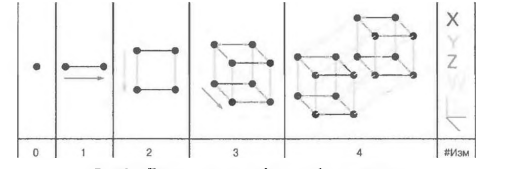

Рассмотрим единичный гиперкуб, который в двумерном пространстве будет просто квадратом с размерами $1\times1$. Затем сделаем в нём отступ в 0.001 от границы. Вопрос: какова вероятность, что случайная точка попадёт в этот отступ?

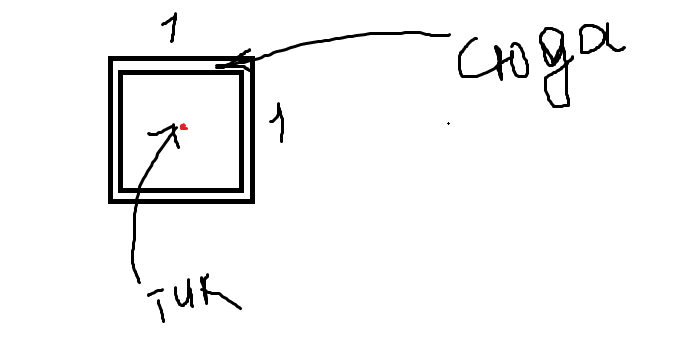

Для двумерного пространства мы можем найти ответ:

In [12]:
1 * 1 - (1 - 0.001 * 2) * (1 - 0.001 * 2)

0.0039959999999999996

Вероятность очень маленькая, что неудивительно: легче всего попасть в ту область, которая имеет большую площадь. А если увеличить размерность пространства?

In [13]:
# определим функцию, которая будет рассчитывать вероятность
# попадения точки в отступ в n-мерном гиперкубе
def point_prob(n_dimensions, length, margin):
    return length ** n_dimensions - (length - margin * 2) ** (n_dimensions)

# длина одного ребра гиперкуба неизменно единичная
LENGTH_HYPERCUBE = 1
# величина отступа тоже неизменна
MARGIN_HYPERCUBE = 0.001

for n_dimentions in [2, 3, 10, 100, 1_000, 10_000]:
    print(f"Для {n_dimentions}-мерного гиперкуба p={point_prob(n_dimentions, LENGTH_HYPERCUBE, MARGIN_HYPERCUBE):.6f}")

Для 2-мерного гиперкуба p=0.003996
Для 3-мерного гиперкуба p=0.005988
Для 10-мерного гиперкуба p=0.019821
Для 100-мерного гиперкуба p=0.181433
Для 1000-мерного гиперкуба p=0.864935
Для 10000-мерного гиперкуба p=1.000000


Вероятность того, что точка окажется в зазоре на краю, для 10 000-мерного куба превышает 99.9999%. Большинство точек внутри многомерного гиперкуба очень близки к краю, и в следствие этой закономерности есть забавный факт: любой, кого вы знаете, вероятно, занимает крайнюю позицию минимум в одном измерении (скажем, по количеству сахара, добавляемого в кофе), если вы
учтете достаточное число измерений.

А что можно сказать о двух  точках, расположенном в этом единичном гиперкубе? Существует отличие, причиняющее больше беспокойства: если вы произвольно выбираете две точки внутри единичного квадрата, то расстояние между ними будет приблизительно 0.52, для трёхмерного куба $-$ 0.66. Но что можно сказать о двух точках, произвольно выбранных в единичном 1 000-мерном кубе? 

In [14]:
from scipy.spatial import distance

# функция, которая рассчитывает среднее расстояние между каждыми двумя точками 
# из 1 000 000 случайных точек в n-мерном гиперкубе
def avg_dist(n_dimensions):
    dist = 0.
    n_points = 100_000
    for i in range(n_points):
        p1 = np.random.rand(n_dimensions)
        p2 = np.random.rand(n_dimensions)
        dist += distance.euclidean(p1, p2)
    return dist / n_points

for n_dimentions in [2, 3, 10, 100, 1_000, 10_000]:
    print(f"Для {n_dimentions}-мерного гиперкуба среднее расстояние между 2-мя точками: {avg_dist(n_dimentions):.6f}")

Для 2-мерного гиперкуба среднее расстояние между 2-мя точками: 0.521398
Для 3-мерного гиперкуба среднее расстояние между 2-мя точками: 0.662299
Для 10-мерного гиперкуба среднее расстояние между 2-мя точками: 1.265700
Для 100-мерного гиперкуба среднее расстояние между 2-мя точками: 4.074868
Для 1000-мерного гиперкуба среднее расстояние между 2-мя точками: 12.907659
Для 10000-мерного гиперкуба среднее расстояние между 2-мя точками: 40.823363


Это совершенно парадоксально: как две точки могут оказаться настолько далеко друг от друга, когда они обе находятся внутри того же единичного гиперкуба? Хорошо, просто при высоком количестве измерений пространства вдоволь. В результате многомерные наборы данных подвержены риску оказаться чрезвычайно разреженными: большинство обучающих образцов по всей вероятности будут находиться далеко друг от друга. 

Разумеется, это также означает, что новый образец, видимо, окажется далеко от любого обучающего образца, делая прогнозы гораздо менее надежными, чем при меньшем количестве измерений, поскольку они будут основаны на значительно большем числе экстраполяций. Короче говоря, чем больше измерений имеет обучающий набор, тем выше риск переобучения им.

### 3.2 PCA
<i>Анализ главных компонент (Principal Component Analysis $-$ PCA)</i> является безоговорочно наиболее популярным алгоритмом понижения размерности. Сначала он идентифицирует гиперплоскость, которая находится ближе всего к данным, и затем проецирует на неё данные. Что-то похожее можно увидеть на рисунке ниже:
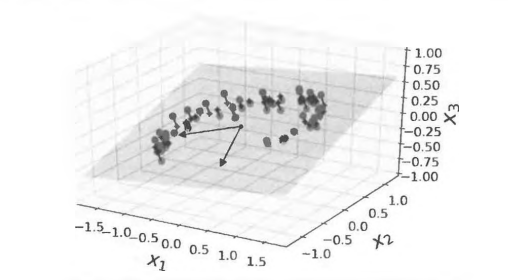

Как это происходит: метод ищет подпростанства меньшей размерности, в ортогональной проекции на которые разброс данных (то есть среднеквадратичное отклонение от среднего значения) максимален. Алгоритм проводит оси (которые и называются компонентами) в каждом из измерений и выбирает ту, в которой сохраняется максимальное количество дисперсии. Так мы вероятно потеряем как можно меньше информации при проецировании. Следующая ось ортогональна (это то же самое, что и перпендикулярна) первой, она выбирается из всех других осей как ось с наибольшей оставшейся дисперсией. 

<b>Алгоритм</b>

1. Если данные не в одном масштабе $-$ стандартизируем данные;
2. Считаем матрицу корреляций или ковариаций по нашим данным;
3. Получаем собственные вектора и собственные значения по матрице корреляций/ковариаций (или используем SVD);
4. Сортируем собственные значения по убыванию (чем выше собственное значение $-$ тем выше дисперсия, которую объясняет соответствующая компонента);
5. По вкусу $-$ выбираем  $k$ собственных значений, где  $k < d$ (изначальной размерности данных), чтобы сократить размерность;
6. Берем соответствующие собственные вектора (отсортированные в том же порядке, что и собственные числа) и составляем из них матрицу проекции  $W$;
7. Умножаем исходные данные $X$ на $W$ и получаем матрицу главных компонент.

### 3.3 Объяснённая дисперсия
Ещё одной полезной порцией информации является <i>коэффициент объяснённой дисперсии</i> каждого главного компонента, доступный через через переменную explained_variance_ratio_. Он указывает долю дисперсии набора данных, которая лежит вдоль каждого главного компонента. 

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# загружается набор данных об ирисах
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# инициализация скалировщика
scaler = StandardScaler()
# скалирование данных (приведение всех признаков к одному масштабу)
X_iris_scaled = scaler.fit_transform(X_iris)

# инициализация объекта PCA
pca = PCA()
pca.fit(X_iris_scaled) # передаются стандартизированные данные

PCA()

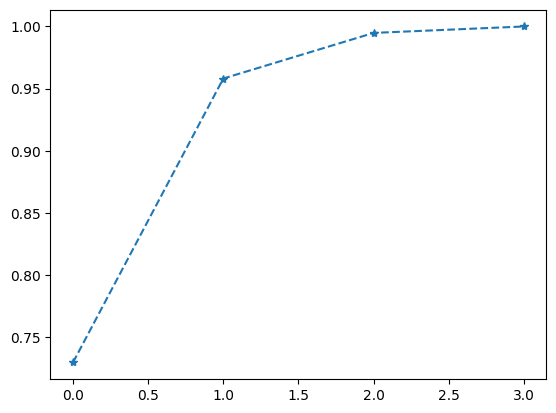

In [4]:
# построим график, на котором отражено нарастание доли объяснённой дисперсии
# в зависимости от увеличения выбора количества компонент
from matplotlib import pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_), '*--');

In [5]:
# 2 компоненты объясняют свыше 98% данных
# можно сократить пространство признаков до 2-х компонент
x_new = PCA(n_components=2).fit_transform(X_iris_scaled)
x_new.shape

(150, 2)

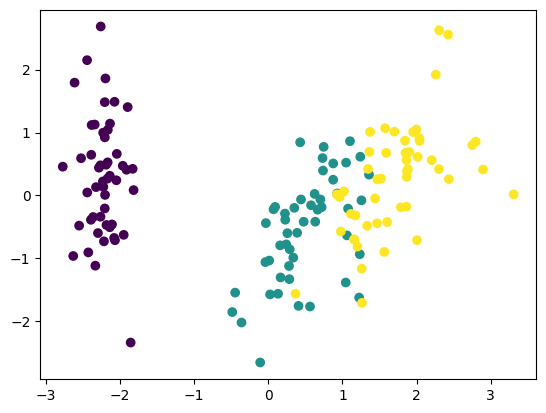

In [6]:
# пространство признаков получается  двумерным, легко изобразить
plt.scatter(x_new[:, 0], x_new[:, 1], c=y_iris, cmap='viridis');

PCA $-$ это отличный алгоритм понижения размерности.
* Алгоритм понижает размерность признакового пространства;
* Новые компоненты являются линейной комбинацией исходных признаков;
* новые компоненты $-$ ортогональны;
* Можно применять в моделях и для визуализации;
* Работает не всегда :(

In [7]:
pca.transform(X_iris_scaled)

array([[-2.26470281e+00,  4.80026597e-01, -1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01, -2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01,  4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01,  9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01,  1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00,  2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02,  3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01, -8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00,  1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01, -2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00, -2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01,  9.37592444e-02,
      